We will be loading up Superstore dataset.
But first lets import pandas, matplotlib, and seaborn ->

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Let's now read the Superstore dataset and inspect to see what are we going to work with ->


In [2]:
superstore_df = pd.read_csv('superstore.csv', encoding='latin1')
print(superstore_df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

Let's answer these first business questions about sales and profitability->

1.Which product categories and sub-categories generate the highest and lowest profits? 

2.What are the monthly trends in sales versus profits? Are there seasonal patterns? 

3.Which customers contribute the most revenue and profit? 

          Category     Profit
0        Furniture   18451.27
1  Office Supplies  122490.80
2       Technology  145454.95


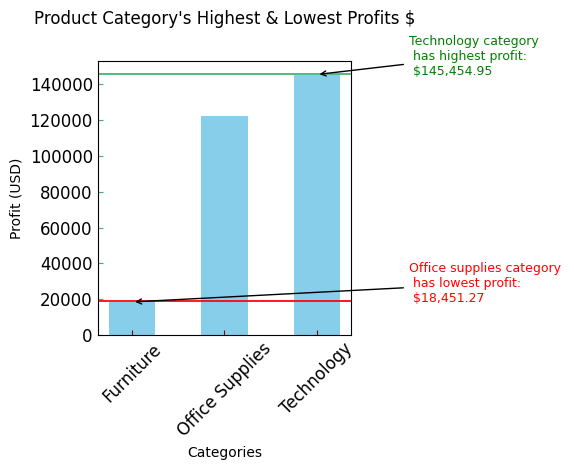

   Sub-Category    Profit
0   Accessories  41936.64
1    Appliances  18138.01
2           Art   6527.79
3       Binders  30221.76
4     Bookcases  -3472.56
5        Chairs  26590.17
6       Copiers  55617.82
7     Envelopes   6964.18
8     Fasteners    949.52
9   Furnishings  13059.14
10       Labels   5546.25
11     Machines   3384.76
12        Paper  34053.57
13       Phones  44515.73
14      Storage  21278.83
15     Supplies  -1189.10
16       Tables -17725.48


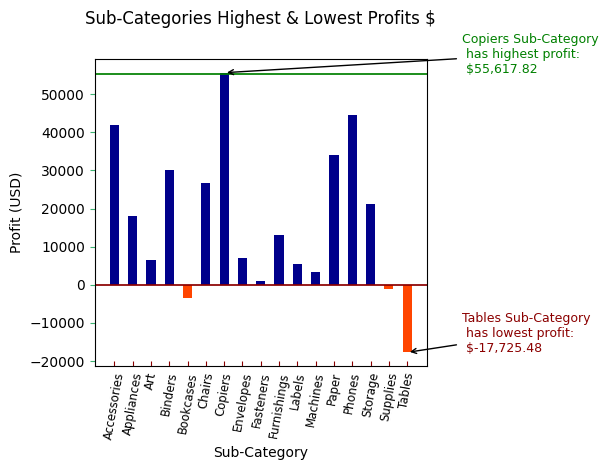

In [3]:
#1.Which product categories and sub-categories generate the highest and lowest profits? ->
categories_profit_highest_lowest = superstore_df.groupby('Category')['Profit'].sum().reset_index()
print(round(categories_profit_highest_lowest,2))

#Lets use a bar chart using plt from matplotlib and give it detail;) ->
plt.bar(x = categories_profit_highest_lowest['Category'], height = categories_profit_highest_lowest['Profit'], 
        width = 0.5, align = 'center' , color = 'skyblue')
plt.axhline(y = 146000, xmin = 0, xmax = 1, linewidth = 1.25, color = '#3CB371')
plt.axhline(y = 19000, xmin = 0, xmax = 1, linewidth = 1.25, color = 'red')

# Get the index (x position) and sales value (y) for the Technology category
tech_index = categories_profit_highest_lowest[categories_profit_highest_lowest['Category'] 
                                              == 'Technology'].index[0]
tech_profit = categories_profit_highest_lowest.loc[tech_index, 'Profit']

# Get the index (x position) and sales value (y) for the Furniture category
furniture_index = categories_profit_highest_lowest[categories_profit_highest_lowest['Category'] 
                                               == 'Furniture'].index[0]
furniture_index_profit = categories_profit_highest_lowest.loc[furniture_index, 'Profit']

# Add texts and detail it to enchance the bar chart visuals ->
plt.annotate('Technology category \n has highest profit: \n $145,454.95', xy = (tech_index, tech_profit), 
             color = 'green', xytext = (3, tech_profit), fontsize = 9, 
             arrowprops = dict(arrowstyle = '->', color = 'black'))

plt.annotate('Office supplies category \n has lowest profit: \n $18,451.27', xy = (furniture_index, furniture_index_profit), 
             color = 'red', xytext = (3, furniture_index_profit), fontsize = 9, 
             arrowprops = dict(arrowstyle = '->', color = 'black'))

# Style x and y values to give it a more presentable look and detail :) ->
plt.tick_params(axis = 'x', direction = 'in', color = 'darkred', labelsize = 
                'large', labelcolor = 'black', labelrotation = 45)

plt.tick_params(axis = 'y', direction = 'in', color = '#3CB371', 
                labelsize = 'large', labelcolor = 'black')

#Show our final graph result :) ->
plt.title("Product Category's Highest & Lowest Profits $", pad = 27)
plt.xlabel('Categories')
plt.ylabel('Profit (USD)')
plt.tight_layout()
plt.show()

#And sub-categories generate the highest and lowest profits? ->
highest_lowest_sub_category_profits = superstore_df.groupby('Sub-Category')['Profit'].sum().reset_index()
print(round(highest_lowest_sub_category_profits, 2))

colors = ['orangered' if profit < 0 else 'darkblue' for profit in highest_lowest_sub_category_profits['Profit']]

#Lets use a bar chart using plt from matplotlib and give it detail;) ->
plt.bar(x = highest_lowest_sub_category_profits['Sub-Category'], 
        height = highest_lowest_sub_category_profits['Profit'], width = 0.5, 
        align = 'center', color = colors)
                
plt.axhline(y = 55400, xmin = 0, xmax = 1, linewidth = 1.25, color = 'green')
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1.25, color = 'darkred')

# Style x and y values to give it a more presentable look and detail :) ->
plt.tick_params(axis = 'x', direction = 'in', color = 'darkred', 
                labelsize = 'small', labelcolor = 'black', labelrotation = 80)
plt.tick_params(axis = 'y', direction = 'out', color = '#3CB371', labelsize = 'medium', labelrotation = 0)

# Get the index (x position) and sales value (y) for the Copiers csub-ategory
copiers_index = highest_lowest_sub_category_profits[highest_lowest_sub_category_profits['Sub-Category'] 
                                              == 'Copiers'].index[0]
copiers_profit = highest_lowest_sub_category_profits.loc[copiers_index, 'Profit']

# Get the index (x position) and sales value (y) for the Tables sub-category
tables_index = highest_lowest_sub_category_profits[highest_lowest_sub_category_profits['Sub-Category'] 
                                               == 'Tables'].index[0]
tables_index_profit = highest_lowest_sub_category_profits.loc[tables_index, 'Profit']

plt.annotate('Copiers Sub-Category \n has highest profit: \n $55,617.82', xy = (copiers_index, copiers_profit),
             color = 'green', xytext = (19, copiers_profit),
             fontsize = 9, arrowprops = dict(arrowstyle = '->', color =  'black'))

plt.annotate('Tables Sub-Category \n has lowest profit: \n $-17,725.48', 
             xy = (tables_index, tables_index_profit), xytext = (19, tables_index_profit), 
             fontsize = 9, color = 'darkred', arrowprops = dict(arrowstyle = '->', color = 'black'))

#Show our final graph result :) ->
plt.xlabel('Sub-Category')
plt.ylabel('Profit (USD)')
plt.title('Sub-Categories Highest & Lowest Profits $', pad = 25)
plt.tight_layout()
plt.show()

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

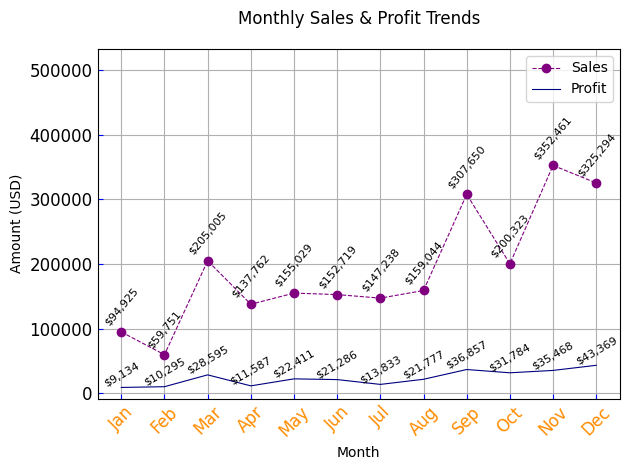

In [4]:
#2.What are the monthly trends in sales versus profits? Are there seasonal patterns?
print(superstore_df.head())

# Ensure Date column is datetime type
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])

# Create a Month column (e.g., Jan, Feb)
superstore_df['Month'] = superstore_df['Order Date'].dt.strftime('%b')
# Create New column called month number to track number for each correspondent month ->
superstore_df['Month Number'] = superstore_df['Order Date'].dt.month
# Make every first letter of every month capitalized for a more professional appearannce ->
superstore_df['Month'] = superstore_df['Month'].apply(str.title)
# Print new df result ->
print(superstore_df.head())

# Group sales and profit by months ->
sales_profit_by_months = superstore_df.groupby(['Month', 'Month Number'])[['Sales', 'Profit']].sum().reset_index()
sales_profit_by_months.sort_values('Month Number', inplace = True)

# Print() sales_profit_by_months to get new dataframe result ->
print(round(sales_profit_by_months,2))

#Lets use a line chart to compare sales and profits trends by months: ->
plt.plot(sales_profit_by_months['Month'], sales_profit_by_months['Sales'], color = 'purple', marker='o'
         ,linewidth = 0.8, linestyle = 'dashed', label = 'Sales')
for i, value in enumerate(sales_profit_by_months['Sales']):
    plt.text(i, value + 10000, f'${value:,.0f}', 
             ha = 'center', color = 'black', fontsize = 8, rotation = 50)

plt.plot(sales_profit_by_months['Month'], sales_profit_by_months['Profit'], color = 'navy',
         linewidth = 0.8, linestyle = 'solid', label = 'Profit', marker = '')

for i, value in enumerate(sales_profit_by_months['Profit']):
    plt.text(i, value + 2000, f'${value:,.0f}', 
             ha = 'center', color = 'black', fontsize = 8, rotation  = 30)

plt.tick_params(axis = 'x', direction = 'in', color = 'blue', labelsize = 'large'
                , labelcolor = 'darkorange', labelrotation = 45)
plt.tick_params(axis = 'y', direction = 'in', color = 'blue', labelsize = 'large', labelcolor = 'black')

max_y = max(sales_profit_by_months['Sales']) + 180000  # Add padding

plt.ylim(top=max_y)  # Set the Y-axis top limit higher than your highest point
plt.legend(bbox_to_anchor = (1,1))
plt.title('Monthly Sales & Profit Trends', pad = 18)
plt.xlabel('Month')
plt.ylabel('Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()